# Imports

In [1]:
import wrangle_ali as wr
import stats_conclude as sc

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

Load in successful... awaiting commands


# Wrangle

* cleaned using function
    * combined CSV files
    * renamed columns
    * encoded categoricals
* checked nulls
    * none
* checked data types
* checked quality range
    * 3-9 not 0-10
        * there are no wines rated 0, 1, 2, or 10.
* checked proportion of type
    * white = 75%
    * red = 25%
* outliers are identified and *not* removed

In [2]:
df = wr.wrangle_wine_initial()
df.head()

Acquire Details
CSV found
CSV found
Combined CSV's into one DF
--------------------------------------------
Prepare Details
Renamed columns for ease of use
Encoded Type column


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,sodium,free_SO2_shelf_life,total_SO2_processed_level,density,pH,preservatives,alcohol,quality,type,type_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0


In [3]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,sodium,free_SO2_shelf_life,total_SO2_processed_level,density,pH,preservatives,alcohol,quality,type,type_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0


In [4]:
# check nulls
df.isnull().sum()

fixed_acidity                0
volatile_acidity             0
citric_acid                  0
residual_sugar               0
sodium                       0
free_SO2_shelf_life          0
total_SO2_processed_level    0
density                      0
pH                           0
preservatives                0
alcohol                      0
quality                      0
type                         0
type_white                   0
dtype: int64

In [5]:
# check value_counts
df.dtypes

fixed_acidity                float64
volatile_acidity             float64
citric_acid                  float64
residual_sugar               float64
sodium                       float64
free_SO2_shelf_life          float64
total_SO2_processed_level    float64
density                      float64
pH                           float64
preservatives                float64
alcohol                      float64
quality                        int64
type                          object
type_white                     uint8
dtype: object

In [6]:
# the actual range is 3-9 not 0-10, outliers...
df.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [7]:
# check proportions
round((df.type.value_counts(normalize=True)* 100),2)

white    75.39
red      24.61
Name: type, dtype: float64

In [8]:
wr.outliers(df)

Type is a categorical column.
Type white is a categorical column.
--------------------------------------------
Outliers Calculated with IQR Ranges, multiplier 1.5

Fixed acidity < = 9.65 and > 4.45
Volatile acidity < = 0.66 and > -0.02
Citric acid < = 0.6 and > 0.04
Residual sugar < = 17.55 and > -7.65
Sodium < = 0.11 and > -0.0
Free so2 shelf life < = 77.0 and > -19.0
Total so2 processed level < = 274.5 and > -41.5
Density < = 1.0 and > 0.99
Ph < = 3.64 and > 2.8
Preservatives < = 0.86 and > 0.18
Alcohol < = 14.0 and > 6.8
Quality < = 7.5 and > 3.5


# Preprocessing

* train, validate, test
* X_train, X_validate, X_test assignment
* scaled using MinMaxScaler


In [9]:
train, validate, test = wr.split_data_stratify(df, 'quality')
train.head()

Prepared DF: (6497, 14)
Train: (3897, 14)
Validate: (1300, 14)
Test: (1300, 14)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,sodium,free_SO2_shelf_life,total_SO2_processed_level,density,pH,preservatives,alcohol,quality,type,type_white
871,7.7,0.34,0.58,11.1,0.039,41.0,151.0,0.99780,3.06,0.49,8.6,5,white,1
2965,5.5,0.34,0.26,2.2,0.021,31.0,119.0,0.98919,3.55,0.49,13.0,8,white,1
2477,6.1,0.27,0.31,1.5,0.035,17.0,83.0,0.99076,3.32,0.44,11.1,7,white,1
673,8.2,0.73,0.21,1.7,0.074,5.0,13.0,0.99680,3.20,0.52,9.5,5,red,0
3115,6.3,0.17,0.32,4.2,0.040,37.0,117.0,0.99182,3.24,0.43,11.3,6,white,1


In [10]:
# variable assignment
X_train = train.drop(columns=('type'))
X_validate = validate.drop(columns=('type'))
X_test = test.drop(columns=('type'))

In [11]:
# scaling variables can send in quality if we want 
X_train_scaled, X_validate_scaled, X_test_scaled = wr.scaler_minmax(X_train, X_validate, X_test)
X_train_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,sodium,free_SO2_shelf_life,total_SO2_processed_level,density,pH,preservatives,alcohol,quality,type_white
871,0.322314,0.173333,0.58,0.336570,0.049834,0.138889,0.334101,0.460509,0.251969,0.146893,0.086957,0.333333,1.0
2965,0.140496,0.173333,0.26,0.048544,0.019934,0.104167,0.260369,0.088908,0.637795,0.146893,0.724638,0.833333,1.0
2477,0.190083,0.126667,0.31,0.025890,0.043189,0.055556,0.177419,0.156668,0.456693,0.118644,0.449275,0.666667,1.0
673,0.363636,0.433333,0.21,0.032362,0.107973,0.013889,0.016129,0.417350,0.362205,0.163842,0.217391,0.333333,0.0
3115,0.206612,0.060000,0.32,0.113269,0.051495,0.125000,0.255760,0.202417,0.393701,0.112994,0.478261,0.500000,1.0


# Explore

Answer the following initial questions:

* Do chlorides (sodium) affect quality?
* Is free sulfur dioxide related to pH?
* Is alcohol content related to residual sugars?
* Does alcohol content affect quality of wine?

## 1. Do chlorides (sodium) affect quality?

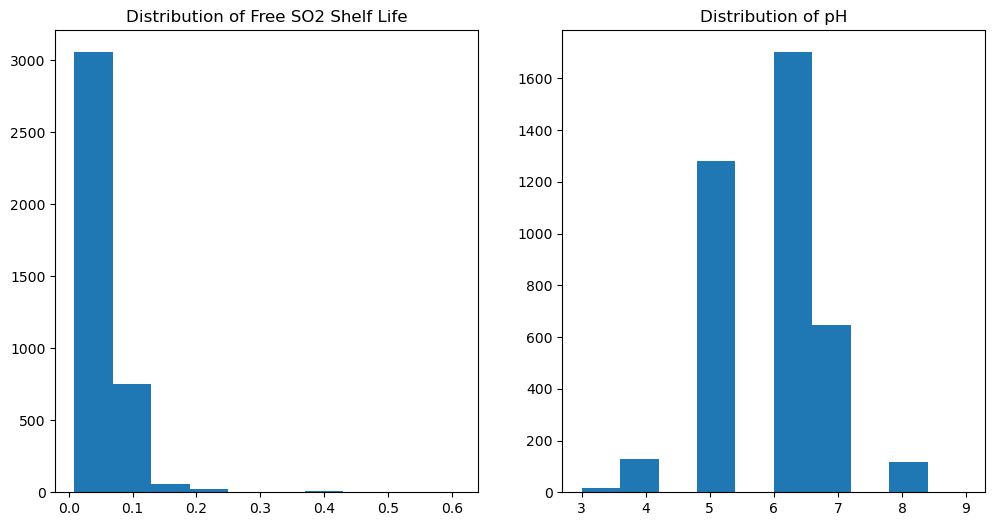

In [12]:
# distribution of free_SO2 and pH
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.hist(train.sodium)
plt.title('Distribution of Free SO2 Shelf Life')

plt.subplot(122)
plt.hist(train.quality)
plt.title('Distribution of pH')
plt.show()

$H_o$: As the rank of quality increases, the amount of chlorides does not change

$H_a$: As the rank of quality increases, the amount of chlorides does change

In [13]:
# use Spearman's Test for correlation for two continous variables because quality is rank ordered
sc.conclude_spearmanr(train.sodium, train.quality)

Non-Parametric data: Spearman's R test successful...
r (correlation value): -0.3097438037403542
p-value: 0.0000000000 < 0.05?
----
We can reject the null hypothesis.


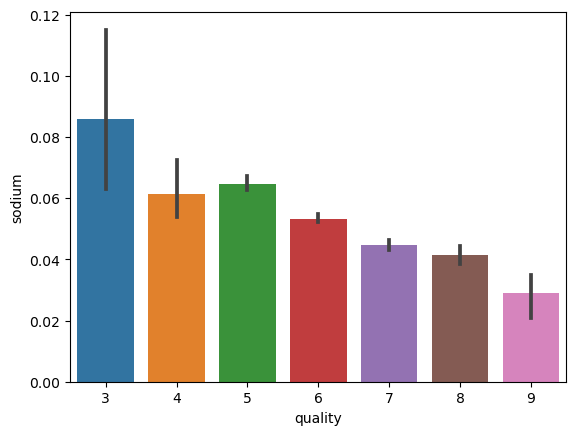

In [14]:
sns.barplot(data=train, x='quality', y='sodium')
plt.show()

## 2. Is free sulfur dioxide related to pH?

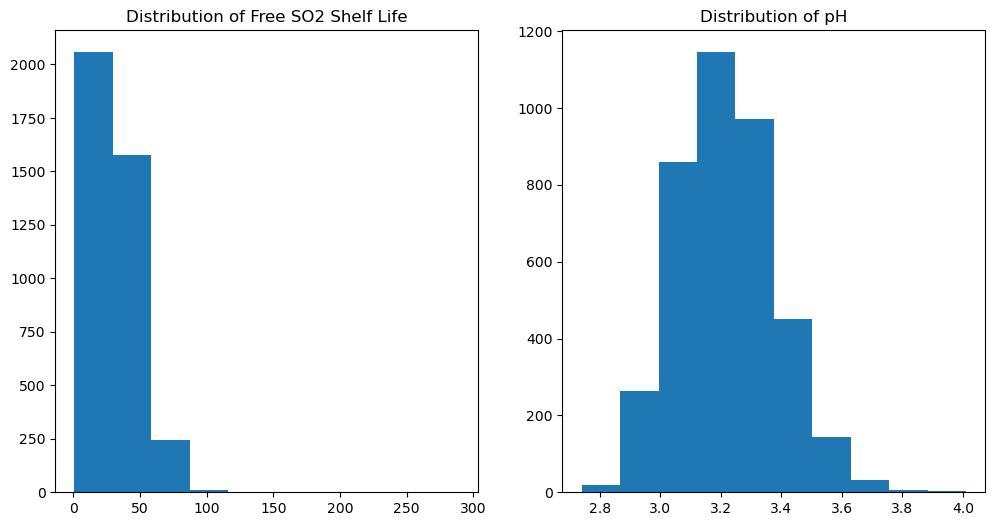

In [15]:
# distribution of free_SO2 and pH
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.hist(train.free_SO2_shelf_life)
plt.title('Distribution of Free SO2 Shelf Life')

plt.subplot(122)
plt.hist(train.pH)
plt.title('Distribution of pH')
plt.show()

$H_o$: There is no linear relationship

$H_a$: There is a linear relationship

In [16]:
# not normal distribution proceed with spearman's correlation test
sc.conclude_spearmanr(train.free_SO2_shelf_life, train.pH)

Non-Parametric data: Spearman's R test successful...
r (correlation value): -0.15278404229543982
p-value: 0.0000000000 < 0.05?
----
We can reject the null hypothesis.


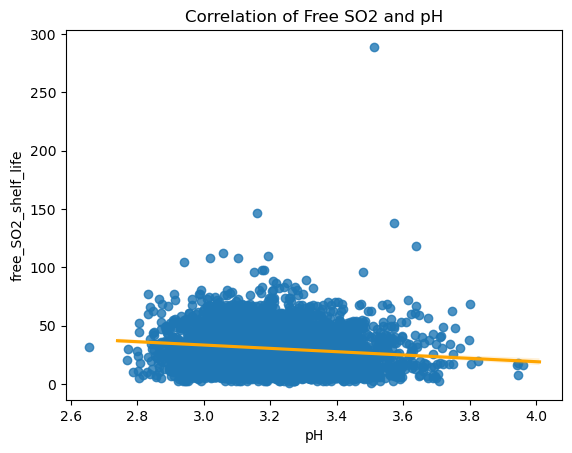

In [17]:
# visualize
sns.regplot(data=train, x='pH', y='free_SO2_shelf_life',x_jitter=.1, line_kws={'color':'orange'})
plt.title("Correlation of Free SO2 and pH")
plt.show()

## 3. Is alcohol content related to residual sugars?

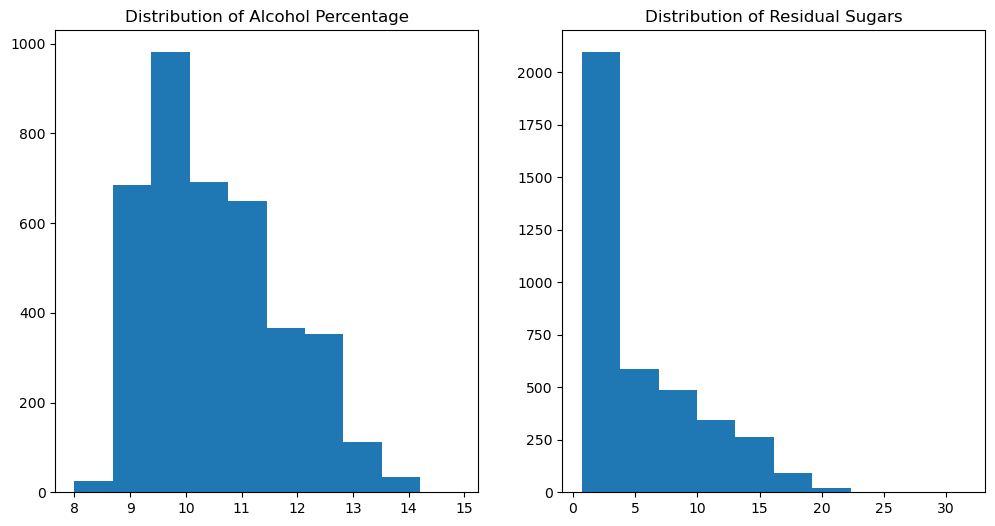

In [18]:
# distribution of alcohol and residual sugars
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.hist(train.alcohol)
plt.title('Distribution of Alcohol Percentage')

plt.subplot(122)
plt.hist(train.residual_sugar)
plt.title('Distribution of Residual Sugars')
plt.show()

$H_o$: There is no linear relationship

$H_a$: There is a linear relationship

In [19]:
# analyze with spearman's r - assumptions not met for pearson's
sc.conclude_spearmanr(train.alcohol, train.residual_sugar)

Non-Parametric data: Spearman's R test successful...
r (correlation value): -0.31942262018023665
p-value: 0.0000000000 < 0.05?
----
We can reject the null hypothesis.


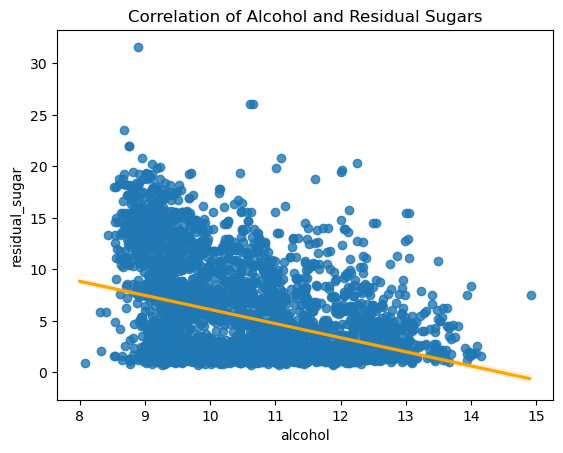

In [20]:
# visualize
sns.regplot(data=train, x='alcohol', y='residual_sugar',x_jitter=.1, line_kws={'color':'orange'})
plt.title("Correlation of Alcohol and Residual Sugars")
plt.show()

## 4. Does alcohol content affect quality of wine?

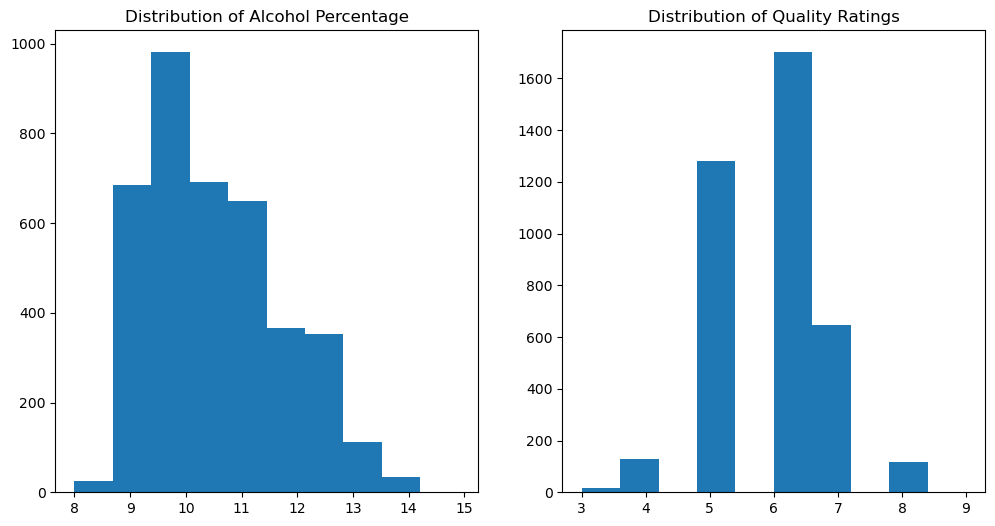

In [21]:
# distribution of alcohol and quality
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.hist(train.alcohol)
plt.title('Distribution of Alcohol Percentage')

plt.subplot(122)
plt.hist(train.quality)
plt.title('Distribution of Quality Ratings')
plt.show()

$H_o$: As the alcohol percentage increases, the rank of quality does not change

$H_a$: As the alcohol percentage increases, the rank of quality does change

In [22]:
# analyze (spearman or pearson - they both get .44)
sc.conclude_pearsonr(train.alcohol, train.quality)

Parametric data: Pearson's R test successful...
r (correlation value): 0.43840078077880545
p-value: 0.0000000000 < 0.05?
----
We can reject the null hypothesis.


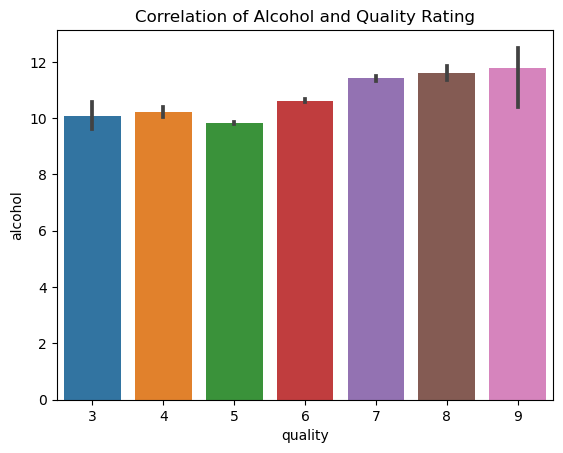

In [23]:
# visualize
sns.barplot(data=train, y='alcohol', x='quality')
plt.title("Correlation of Alcohol and Quality Rating")
plt.show()


# Explore Takeaway:

* Answer the following initial questions:
   1. Do chlorides (sodium) affect quality? <br>
       * Yes, negative relationship (-.31)
   2. Is free sulfur dioxide related to pH? <br>
       * Rejected the null, but barely
   3. Is alcohol content related to residual sugars? <br>
       * Yes, negative relationship (-.32)
   4. Does alcohol content affect quality of wine? <br>
       * Yes, positive relationship (.44)

**Visuals**

* findings for relationship to quality:
    * fixed acidity increases, quality goes down
    * volatile acidity increases, quality goes down - worse than fixed 
    * citric acid has slight positive relationship
    * residual sugar has no relationship - not visually significant
    * chlorides has negative relationship, more chlorides = less quality *super* negative
    * free sulfur dioxide increases quality slightly (look further into type as a 3rd variable)
    * total sulfur dioxide has no signifcance
    * density has negative relationship *significantly* negative
    * pH has no affect on quality
    * preservatives have no affect on quality
    * alcohol is a positive relationship (moderately positive)
    * type has no impact - red is slightly less quality

**Numericals**

* quality range is actually 3-9, not 0-10
    * mean is 5.8
* type has a 75/25 percent proportion
    * white = 75%
    * red = 25%
* pH typical range 0-14
    * wine range 2.72 - 4.01
    * mean 3.2
    * battery acid is a 1, vinegar is 3, tomato juice is a 4


**Feature Engineering**

* total_acidity = fixed + volatile acids
    * contributes directy to quality of wine - negative correlation, higher the acid, lower the quality

# Clustering

**Feature sets to send in:**

* fixed, volatile, citric acid
* residual sugar, alcohol, type_white
* pH, preservatives, density

### Feature Set 1:

* use X_train_scaled
* clusters = 2
* fixed, volatile, citric acid

In [24]:
# make and fit the kmeans thing
# make

kmeans = KMeans(n_clusters=2, random_state=123)

# fit on X
kmeans.fit(X_train_scaled[['fixed_acidity', 'volatile_acidity','citric_acid']])

# use on X
pred_set_1 = kmeans.predict(X_train_scaled[['fixed_acidity', 'volatile_acidity','citric_acid']])

In [25]:
# add cluster prediction back onto X_train and X_train_scaled dataframe

X_train['cluster_set_1'] = pred_set_1
X_train_scaled['cluster_set_1'] = pred_set_1

X_train.sample(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,sodium,free_SO2_shelf_life,total_SO2_processed_level,density,pH,preservatives,alcohol,quality,type_white,cluster_set_1
780,6.0,0.395,0.00,1.40,0.042,7.0,55.0,0.99135,3.37,0.38,11.20,4,1,1
4811,7.0,0.170,0.42,1.00,0.075,19.0,71.0,0.99103,3.32,0.62,11.40,6,1,0
1066,6.4,0.300,0.51,5.50,0.048,62.0,172.0,0.99420,3.08,0.45,9.10,6,1,0
3381,6.9,0.190,0.35,6.90,0.045,51.0,125.0,0.99330,3.10,0.44,10.70,7,1,0
2396,8.4,0.300,0.25,17.75,0.047,25.0,218.0,1.00016,2.98,0.66,9.10,5,1,0
3025,5.4,0.220,0.29,1.20,0.045,69.0,152.0,0.99178,3.76,0.63,11.00,7,1,0
4544,5.8,0.280,0.30,3.90,0.026,36.0,105.0,0.98963,3.26,0.58,12.75,6,1,0
743,11.6,0.410,0.58,2.80,0.096,25.0,101.0,1.00024,3.13,0.53,10.00,5,0,0
1689,7.1,0.160,0.25,1.30,0.034,28.0,123.0,0.99150,3.27,0.55,11.40,6,1,0
2494,7.6,0.310,0.23,12.70,0.054,20.0,139.0,0.99836,3.16,0.50,9.70,4,1,0


In [26]:
# visualize means first 
X_train.groupby('quality')['fixed_acidity', 'volatile_acidity','citric_acid'].mean()

,fixed_acidity,volatile_acidity,citric_acid
quality,,,
3,8.155556,0.593056,0.281111
4,7.324615,0.469808,0.283385
5,7.377886,0.391720,0.306919
6,7.132069,0.313407,0.322816
7,7.115301,0.288547,0.332751
8,6.770690,0.280172,0.324483
9,7.700000,0.290000,0.366667


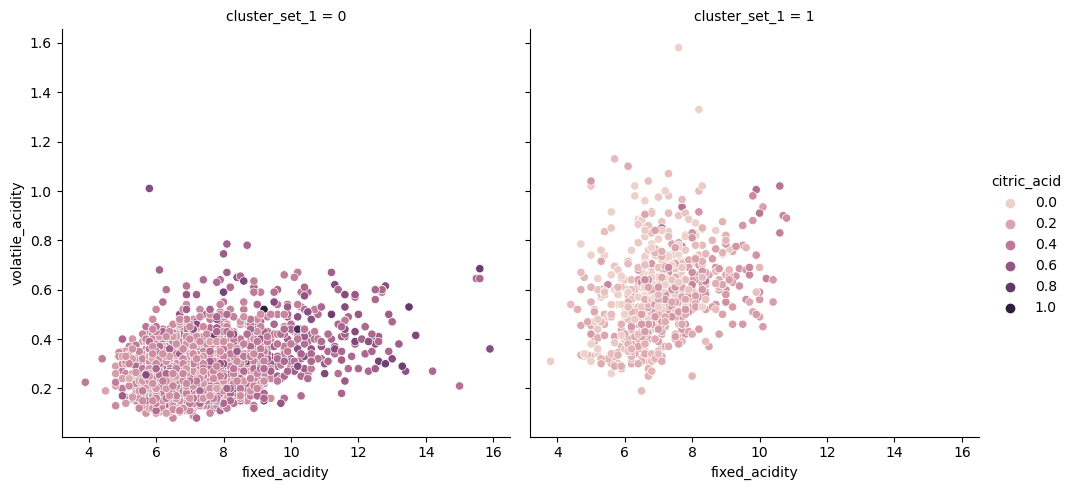

In [27]:
# separate to see each cluster - hue is citric acid
sns.relplot(data=X_train, x='fixed_acidity', y='volatile_acidity', hue='citric_acid', col='cluster_set_1', col_wrap=2)
plt.show()

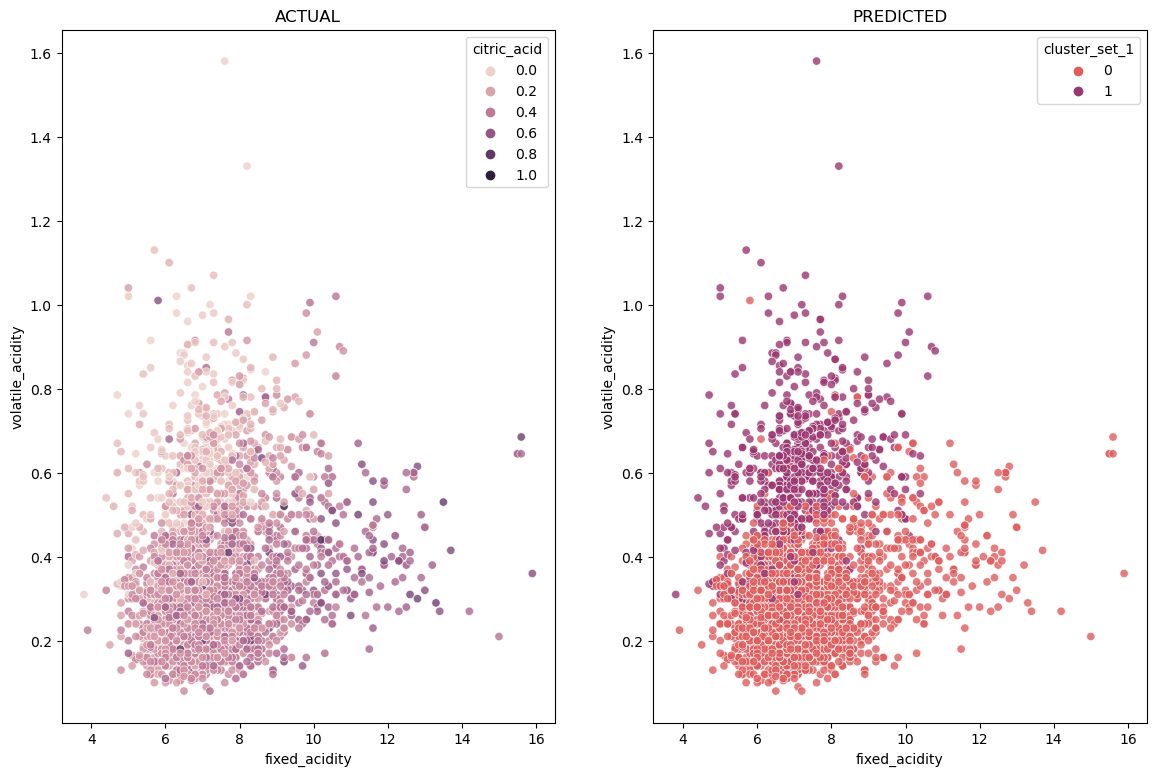

In [28]:
# viz to see cluster results against actual graph 
plt.figure(figsize=(14, 9))

plt.subplot(121)
sns.scatterplot(data=train, x='fixed_acidity', y='volatile_acidity', hue='citric_acid', alpha=.8)
plt.title('ACTUAL')

plt.subplot(122)
sns.scatterplot(data=X_train, x='fixed_acidity', y='volatile_acidity', hue='cluster_set_1', palette='flare', alpha=.8)
plt.title('PREDICTED')
plt.show()

### Feature Set 1 Takeaways:

Features sent in:
* clusters = 2
* fixed, volatile, citric acid

Means of the centroids:
* between quality rating 5 and 6, the volatile acidity mean drops from 39 to 31 and continues it's negative trend
* quality level 8 has the lowest fixed acidity while quality level 9 (highest) has the second highest mean
* citric acid means have an inverse relationship to volatile acidity

Visuals:
* Clustering looks to be fairly weak. There is a relationship between citric acid and volatile acid but I don't believe that amounts to any significant clusters.
* Volatile Acidity results from the degradation of citric acid. As citric acid degrades, volatile acidity goes up.


### Feature Set 2:

* use X_train_scaled
* clusters = 2
* residual sugar, alcohol, type_white

In [29]:
# make and fit the kmeans thing
# make

kmeans = KMeans(n_clusters=2, random_state=123)

# fit on X
kmeans.fit(X_train_scaled[['residual_sugar', 'alcohol','type_white']])

# use on X
pred_set_2 = kmeans.predict(X_train_scaled[['residual_sugar', 'alcohol','type_white']])

In [30]:
# add cluster prediction back onto X_train and X_train_scaled dataframe

X_train['cluster_set_2'] = pred_set_2
X_train_scaled['cluster_set_2'] = pred_set_2

X_train.sample(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,sodium,free_SO2_shelf_life,total_SO2_processed_level,density,pH,preservatives,alcohol,quality,type_white,cluster_set_1,cluster_set_2
280,11.4,0.26,0.44,3.6,0.071,6.0,19.0,0.99860,3.12,0.82,9.3,6,0,0,1
1046,7.6,0.78,0.00,1.7,0.076,33.0,45.0,0.99612,3.31,0.62,10.7,6,0,1,1
817,6.6,0.56,0.22,8.9,0.034,27.0,133.0,0.99675,3.20,0.51,9.1,5,1,1,0
1317,9.9,0.44,0.46,2.2,0.091,10.0,41.0,0.99638,3.18,0.69,11.9,6,0,0,1
4239,5.7,0.28,0.36,1.8,0.041,38.0,90.0,0.99002,3.27,0.98,11.9,7,1,0,0
4293,7.2,0.21,0.36,15.7,0.045,68.0,183.0,0.99922,3.25,0.76,9.4,5,1,0,0
150,7.3,0.33,0.47,2.1,0.077,5.0,11.0,0.99580,3.33,0.53,10.3,6,0,0,1
4622,6.5,0.50,0.22,4.1,0.036,35.0,131.0,0.99020,3.26,0.55,13.0,7,1,1,0
1345,8.2,0.44,0.24,2.3,0.063,10.0,28.0,0.99613,3.25,0.53,10.2,6,0,1,1
1123,9.8,0.36,0.45,1.6,0.042,11.0,124.0,0.99440,2.93,0.46,10.8,5,1,0,0


In [31]:
# visualize first numerically
X_train.groupby('quality')['residual_sugar', 'alcohol','type_white'].mean()

,residual_sugar,alcohol,type_white
quality,,,
3,4.333333,10.086111,0.555556
4,3.971538,10.227308,0.715385
5,5.771724,9.832241,0.677067
6,5.512816,10.621830,0.784832
7,4.790340,11.407584,0.828439
8,5.161207,11.593966,0.905172
9,4.733333,11.766667,1.000000


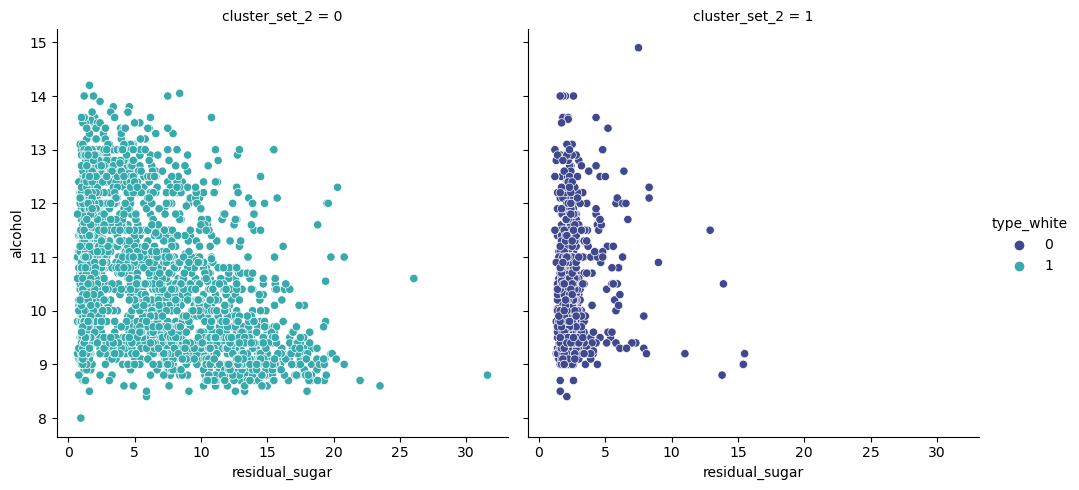

In [32]:
# separate to see each cluster - hue is density
sns.relplot(data=X_train, x='residual_sugar', y='alcohol', hue='type_white', col='cluster_set_2', col_wrap=2, palette='mako')
plt.show()

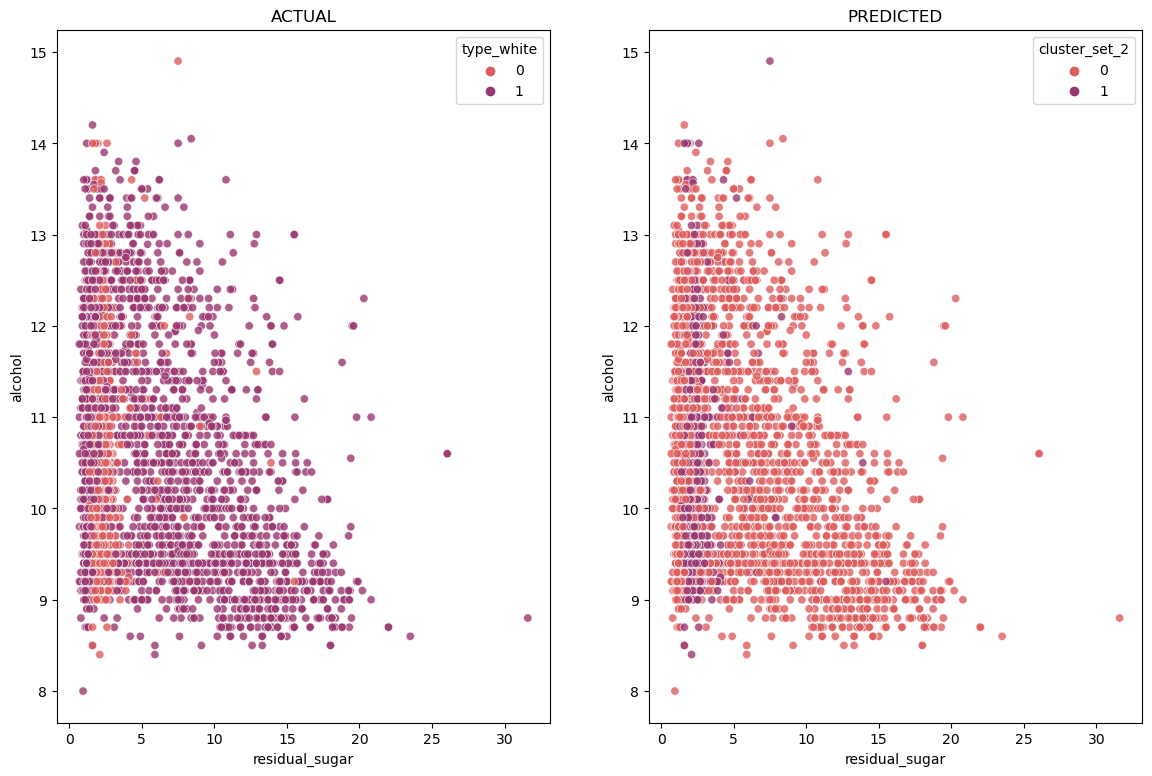

In [33]:
# viz to see cluster results against actual graph
plt.figure(figsize=(14, 9))

plt.subplot(121)
sns.scatterplot(data=train, x='residual_sugar', y='alcohol', hue='type_white', palette='flare', alpha=.8)
plt.title('ACTUAL')

plt.subplot(122)
sns.scatterplot(data=X_train, x='residual_sugar', y='alcohol', hue='cluster_set_2', palette='flare', alpha=.8)
plt.title('PREDICTED')
plt.show()

### Feature Set 2 Takeaways:

Features sent in:
* clusters = 2
* residual sugar, alcohol, type_white

Means of the centroids:
* as quality increases, alcohol content increases
* quality of 9 has a mean of 1 for type_white indicating ALL the wine that is that quality is a white wine

Visuals:
* Clustering successful for this relationship
* it looks like after ~2.5 residual sugar and alcohol relationship changes - that makes sense becuase red wine is lower in sugars than white wine, which is what is displayed visually
* white wine results in a much wider range of residual sugars
* red and white share the same range of alcohol levels


### Feature Set 3:

* use X_train_scaled
* clusters = 2
* pH, preservatives, density

In [34]:
# make and fit the kmeans thing
# make

kmeans = KMeans(n_clusters=2, random_state=123)

# fit on X
kmeans.fit(X_train_scaled[['pH', 'preservatives','density']])

# use on X
pred_set_3 = kmeans.predict(X_train_scaled[['pH', 'preservatives','density']])

In [35]:
# add cluster prediction back onto X_train and X_train_scaled dataframe

X_train['cluster_set_3'] = pred_set_3
X_train_scaled['cluster_set_3'] = pred_set_3

X_train.sample(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,sodium,free_SO2_shelf_life,total_SO2_processed_level,density,pH,preservatives,alcohol,quality,type_white,cluster_set_1,cluster_set_2,cluster_set_3
2878,5.9,0.32,0.33,2.1,0.027,35.0,138.0,0.98945,3.37,0.42,12.7,6,1,0,0,0
4396,7.4,0.27,0.26,11.8,0.053,55.0,173.0,0.99699,3.11,0.60,9.8,5,1,0,0,1
3238,7.6,0.27,0.29,2.5,0.059,37.0,115.0,0.99328,3.09,0.37,9.8,5,1,0,0,0
259,5.8,0.36,0.38,0.9,0.037,3.0,75.0,0.99040,3.28,0.34,11.4,4,1,0,0,0
2215,8.5,0.28,0.34,13.8,0.041,32.0,161.0,0.99810,3.13,0.40,9.9,6,1,0,0,1
3522,6.6,0.32,0.41,7.2,0.048,55.0,178.0,0.99537,3.20,0.46,9.4,5,1,0,0,1
2233,6.5,0.39,0.35,1.6,0.049,10.0,164.0,0.99516,3.35,0.51,9.7,5,1,0,0,1
2923,6.9,0.22,0.31,6.3,0.029,41.0,131.0,0.99326,3.08,0.49,10.8,6,1,0,0,0
4680,6.8,0.63,0.04,1.3,0.058,25.0,133.0,0.99271,3.17,0.39,10.2,4,1,1,0,0
1183,6.4,0.26,0.30,2.2,0.025,33.0,134.0,0.99200,3.21,0.47,10.6,6,1,0,0,0


In [36]:
# visualize first numerically
X_train.groupby('quality')['pH', 'preservatives','density'].mean()

,pH,preservatives,density
quality,,,
3,3.277222,0.534444,0.996332
4,3.231462,0.506308,0.994870
5,3.212956,0.529337,0.995896
6,3.216955,0.529377,0.994432
7,3.229134,0.544080,0.993065
8,3.240086,0.523103,0.992533
9,3.296667,0.516667,0.992400


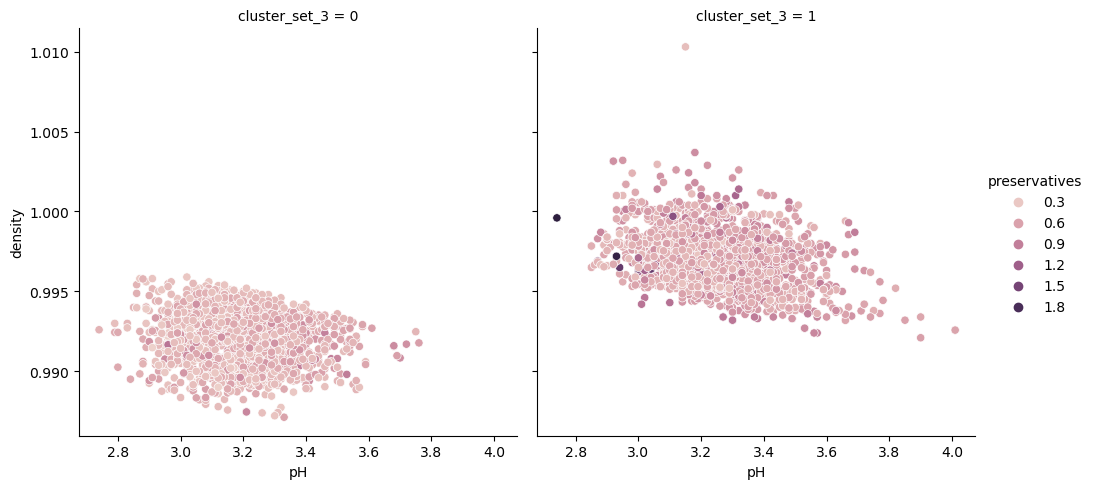

In [37]:
# separate to see each cluster - hue is preservatives
sns.relplot(data=X_train, y='density', x='pH', hue='preservatives', col='cluster_set_3', col_wrap=2)
plt.show()

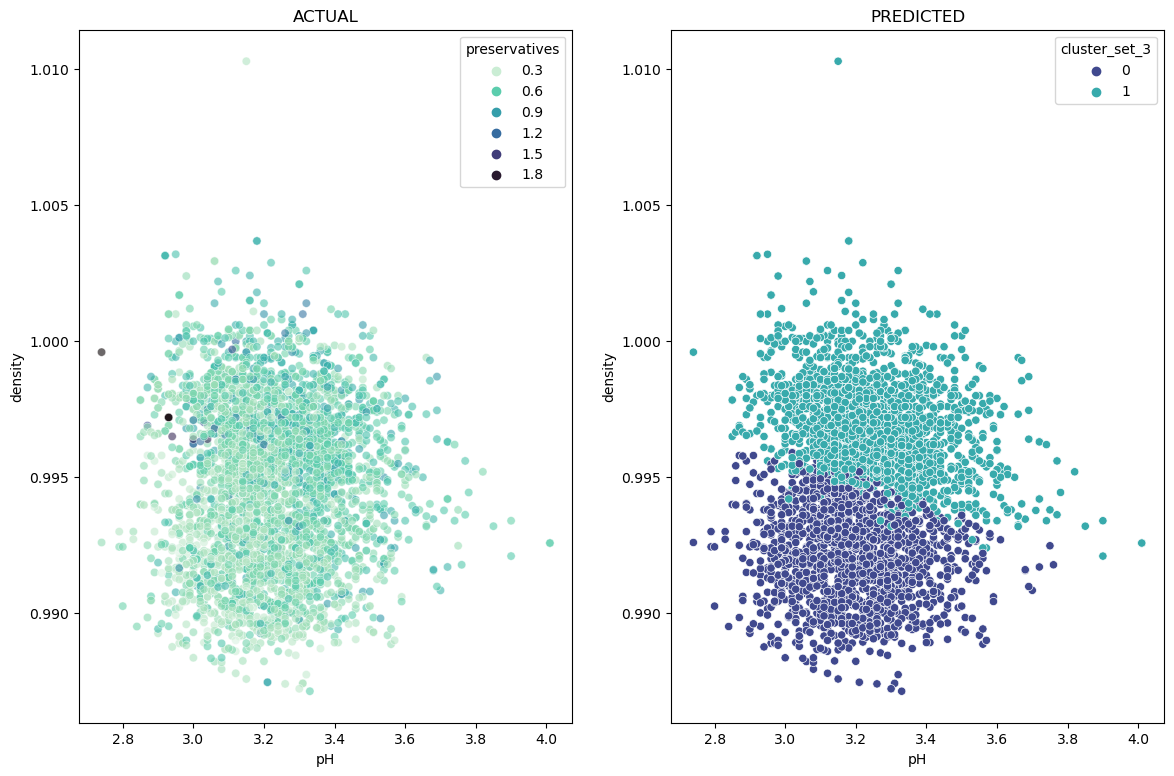

In [38]:
# graphically
plt.figure(figsize=(14, 9))

plt.subplot(121)
sns.scatterplot(data=train, y='density', x='pH', hue='preservatives', palette='mako_r', alpha=.6)
plt.title('ACTUAL')

plt.subplot(122)
sns.scatterplot(data=X_train, y='density', x='pH', hue='cluster_set_3', palette='mako')
plt.title('PREDICTED')
plt.show()

### Feature Set 3 Takeaways:

Features sent in:
* clusters = 2
* pH, preservatives, density

Means of the centroids:
* resulted in zero significance

Visuals:
* clustering failed, there are no clusters to be made
* *slight* relationship noted between density and preservatives, as density goes up, so do preservatives.


# Clustering Takeaway:

* as quality increases, alcohol content increases
* slight relationship noted between density and preservatives, as density goes up, so do preservatives.
* white wine results in a much wider range of residual sugars
* Volatile Acidity results from the degradation of citric acid. As citric acid degrades, volatile acidity goes up.